In [248]:
import pandas as pd
from top2vec import Top2Vec
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from src.data_wrangling.load_data import load_political_quotes

# Load quotations for each of the predefined topics

In [249]:
topics_path = 'data/topics/'
topics_file_names = ['immigration_quotes', 'europe_quotes', 'discrimination_quotes',
                     'russia_quotes', 'covid_quotes', 'terrorism_quotes', 'climate_change_quotes', 'israeli_palestinian_quotes']
topics  = ['Immigration', 'Europe and Brexit', 'Discrimination',
           'Russia', 'Covid', 'Terrorism', 'Climate change', 'Israeli palestinian']

raw_quotes = pd.DataFrame()

for file_name, topic in zip(topics_file_names, topics):
    topic_df = pd.read_csv(topics_path + file_name, index_col=0).reset_index(drop=True)
    topic_df['topic'] = topic
    raw_quotes = pd.concat([raw_quotes, topic_df], ignore_index=True)
raw_quotes

,quotation,speaker,country,political_alignment,date,political_party,topic
0,the boats must be stopped from departing,Matteo Renzi,Italy,centre-left,2015-04-20 01:49:57,Democratic Party,Immigration
1,noticeably reduce the number of refugees.,Angela Merkel,Germany,centre-right,2015-12-19 19:29:48,Christian Democratic Union,Immigration
2,Even if the influx of refugees slows down duri...,Donald Tusk,Poland,centrism,2015-10-15 06:21:30,Civic Platform,Immigration
3,I would expect positive growth in 2015 but thi...,Pier Carlo Padoan,Italy,centre-left,2015-03-15 16:22:01,Democratic Party,Immigration
4,The existing list of secure countries of origi...,Andreas Bausewein,Germany,centre-left,2015-08-31 05:00:00,Social Democratic Party of Germany,Immigration
...,...,...,...,...,...,...,...
30316,propped up by structural inequalities with Pal...,David Sassoli,Italy,centre-left,2020-01-15 15:22:24,Democratic Party,Israeli palestinian
30317,such outrageous acts of terror,Miguel Ángel Moratinos,Spain,centre-left,2020-03-26 13:57:51,Spanish Socialist Workers' Party,Israeli palestinian
30318,The EU reaffirms its readiness to work towards...,Josep Borrell,Spain,centre-left,2020-01-28 23:04:04,Spanish Socialist Workers' Party,Israeli palestinian
30319,we haven't seen a similar situation in the 70 ...,Angela Merkel,Germany,centre-right,2020-03-18 18:00:31,Christian Democratic Union,Israeli palestinian


# What are the parties with the most quotes within each country?

We have decided to compare the right-hand parties because there is a clear distinction between countries and
it would be interesting to let the data show that. If we were to consider quotes from centered-parties it could be harder
to draw that distinction.


In [250]:
import seaborn as sns
palette = sns.color_palette("mako")
palette.reverse()
quotes = raw_quotes
def plot_parties_pie(quotes, country, max_parties=5):
    # Define styles
    country_parties = quotes[quotes.country == country].groupby('political_party').size().to_frame(name='count')
    country_parties_filtered = country_parties.nlargest(max_parties, 'count', keep='first')
    if len(country_parties > max_parties):
        other_parties = country_parties.drop(country_parties_filtered.index)
        country_parties_filtered.loc['Others'] = [other_parties['count'].sum()]  # adding a row
    ax = country_parties_filtered.plot.pie(y='count', ylabel='', figsize=(10, 10), autopct='%.2f', legend=True,
                                           title='Quotations count per political party in %s' %(country),
                                           labels=None, fontsize=14, colors=palette)
    ax.title.set_size(20)
    ax.legend(country_parties_filtered.index)
    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), labels=country_parties_filtered.index, prop={'size': 14})

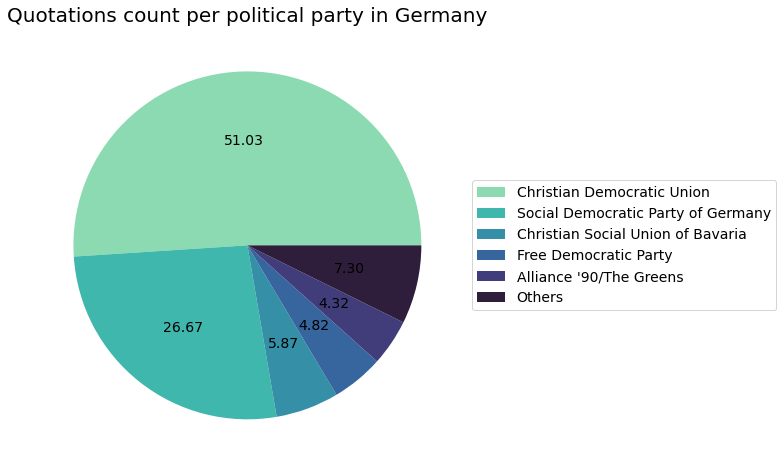

In [251]:
plot =  plot_parties_pie(quotes, 'Germany')


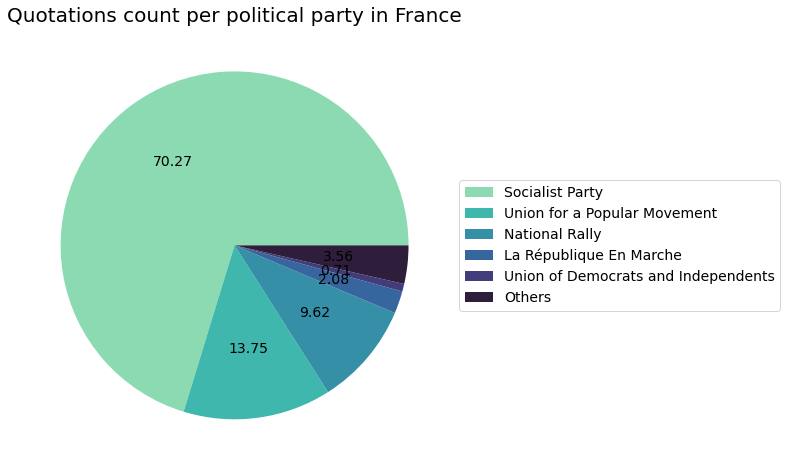

In [252]:
plot =  plot_parties_pie(quotes, 'France')


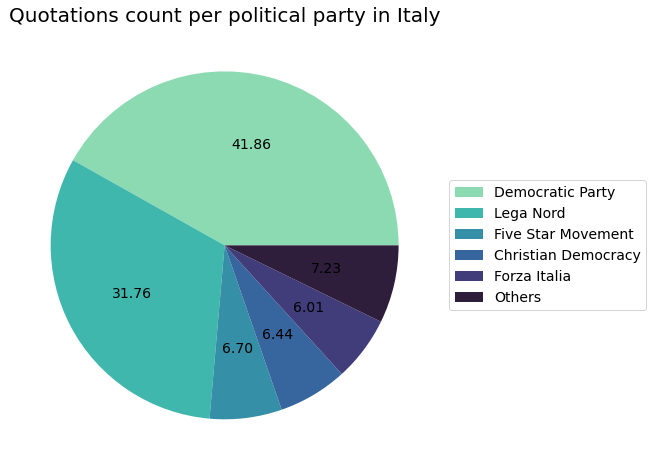

In [253]:
plot =  plot_parties_pie(quotes, 'Italy')


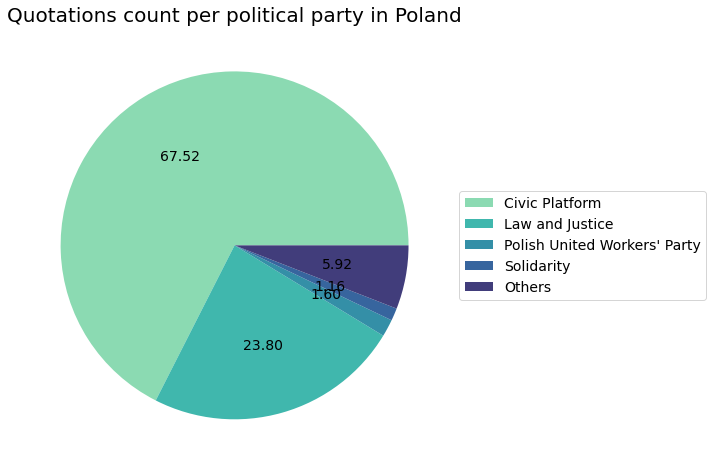

In [254]:
plot =  plot_parties_pie(quotes, 'Poland', max_parties=4)

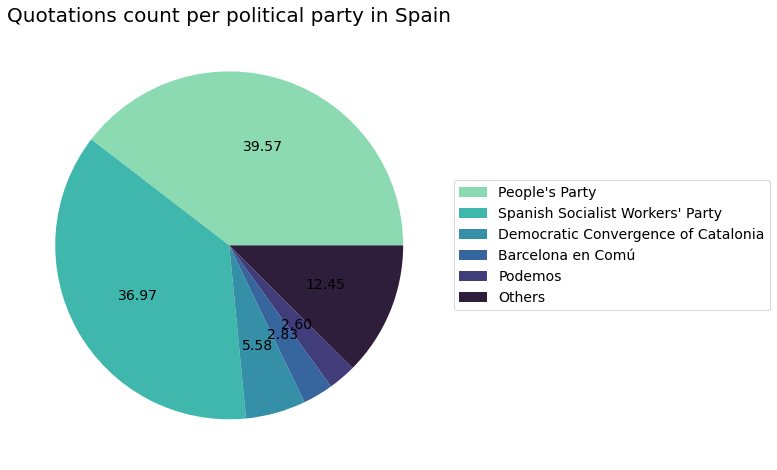

In [255]:
plot =  plot_parties_pie(quotes, 'Spain')

# Filter quotations from politicians from Christian Democratic Union (Germany), Democratic Party (Italy), Socialist Party (France), Civic Platform (Poland), People's Party (Spain)

These are the parties with the most quotations within each country providing more
data to analyse.

In [256]:
parties_countries = [('Christian Democratic Union', 'Germany'), ('Socialist Party', 'France'),
                     ('Democratic Party', 'Italy'), ('Civic Platform', 'Poland'), ("People's Party", 'Spain')]
quotes = pd.DataFrame()
for political_party, country in parties_countries:
    party_quotes = raw_quotes[(raw_quotes.political_party == political_party) & (raw_quotes.country == country)]
    quotes = pd.concat([quotes, party_quotes])
quotes.loc[:, 'country_political_party'] =  quotes['country'] + ' - ' + quotes['political_party']

quotes.reset_index(inplace=True, drop=True)
quotes

,quotation,speaker,country,political_alignment,date,political_party,topic,country_political_party
0,noticeably reduce the number of refugees.,Angela Merkel,Germany,centre-right,2015-12-19 19:29:48,Christian Democratic Union,Immigration,Germany - Christian Democratic Union
1,Temporary border controls are not the same as ...,Steffen Seibert,Germany,centre-right,2015-09-14 11:35:47,Christian Democratic Union,Immigration,Germany - Christian Democratic Union
2,"Europe as a whole must move, and its states mu...",Angela Merkel,Germany,centre-right,2015-08-31 05:10:58,Christian Democratic Union,Immigration,Germany - Christian Democratic Union
3,"We are working at national, European and inter...",Angela Merkel,Germany,centre-right,2015-12-31 10:48:20,Christian Democratic Union,Immigration,Germany - Christian Democratic Union
4,"the refugees are fleeing from IS, not from tho...",Ursula von der Leyen,Germany,centre-right,2015-12-02 08:13:00,Christian Democratic Union,Immigration,Germany - Christian Democratic Union
...,...,...,...,...,...,...,...,...
17427,countering the growing efforts to delegitimize...,José María Aznar,Spain,centre-right,2018-03-15 21:32:48,People's Party,Israeli palestinian,Spain - People's Party
17428,Borrell follows a line -- common in the EU -- ...,Juan Carlos Girauta,Spain,centre-right,2019-10-22 19:30:00,People's Party,Israeli palestinian,Spain - People's Party
17429,I am a supporter of discrimination.,Santiago Abascal,Spain,centre-right,2019-04-22 07:46:44,People's Party,Israeli palestinian,Spain - People's Party
17430,"swung the party further to the right, but too ...",José María Aznar,Spain,centre-right,2019-05-02 17:40:02,People's Party,Israeli palestinian,Spain - People's Party


# How does the opinions of these parties differ on the selected topics?

The first step to see how the opinions of these parties differ is by extracting the polarity and subjectivity of their
quotes. For this task, we have compared to different frameworks, TextBlob and Vader:

In [257]:
from src.sentiment_analysis import get_polarity, get_sentiment
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
# Generate the sentiment and sensitivity value of each of the quotes
quotes['polarity_textblob'] = quotes.quotation.apply(lambda x: get_polarity(x))
quotes['polarity_vader'] = quotes.quotation.apply(lambda x: sia.polarity_scores(x)['compound'])
quotes[['quotation', 'polarity_textblob', 'polarity_vader']]

,quotation,polarity_textblob,polarity_vader
0,noticeably reduce the number of refugees.,0.000000,0.0772
1,Temporary border controls are not the same as ...,0.166667,0.4404
2,"Europe as a whole must move, and its states mu...",0.200000,0.2960
3,"We are working at national, European and inter...",-0.060000,-0.3818
4,"the refugees are fleeing from IS, not from tho...",0.000000,0.2755
...,...,...,...
17427,countering the growing efforts to delegitimize...,0.307359,0.8360
17428,Borrell follows a line -- common in the EU -- ...,-0.300000,-0.2732
17429,I am a supporter of discrimination.,0.000000,0.2732
17430,"swung the party further to the right, but too ...",-0.004762,0.2144


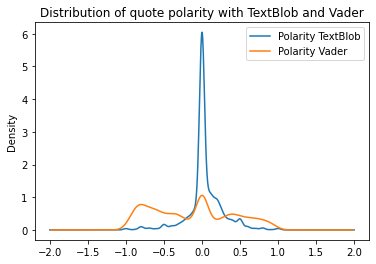

In [258]:
ax = quotes[['polarity_textblob', 'polarity_vader']].plot.kde(title='Distribution of quote polarity with TextBlob and Vader', xlabel='Polarity')
ax.legend(["Polarity TextBlob", "Polarity Vader"])
quotes['sentiment'] = quotes['polarity_vader'].apply(lambda x : get_sentiment(x))

We can see that Vlader provides a more non-neutral distinction compared to TextBlob and it was decided to use it
for further analysis.

In [259]:
from datetime import datetime
from IPython.display import display

second_palette = sns.color_palette("Set2")

def plot_quote_cnt_by_topic(df, topic):
    df = df[df.topic == topic]
    parties_quotes = df.groupby(['country_political_party', 'sentiment']).size().reset_index().set_index('country_political_party')
    parties_quotes.rename(columns={0: 'count'}, inplace=True)
    parties_quotes = parties_quotes.pivot_table(values='count', index=parties_quotes.index, columns='sentiment', aggfunc='first', fill_value=0)
    parties_quotes.plot.bar(stacked=True, figsize=(10, 5), title='%s - Number of quotes over political party' % topic,
                            xlabel='Political party', ylabel='Count', rot=45, color=second_palette)

def generate_parties_df(quotes, topic, polarity='polarity_vader'):
    quotes = quotes[quotes.topic == topic].copy()
    dates = pd.to_datetime(quotes['date'])
    quotes['bucket_date'] = dates.apply(lambda x: datetime(x.year, (((x.month - 1) // 1) * 1) + 1, 1))
    sentiment_quotes = pd.pivot_table(quotes, values=polarity, index=['bucket_date'],
                          columns=['country_political_party'], aggfunc=aggfunc)

    # We also need to make sure that the values across countries is normalised so that countries
    # with less quotes can still be comparable
    sentiment_quotes = (sentiment_quotes-sentiment_quotes.min())/(sentiment_quotes.max()-sentiment_quotes.min()) * 2 - 1
    return quotes, sentiment_quotes
def aggfunc(x):
    return np.mean(x) * len(x)

# For all the countries generate a line representing the sentiment over time
def plot_graphs(quotes, topic, polarity='polarity_vader'):
    quotes, sentiment_quotes = generate_parties_df(quotes, topic, polarity)
    # We also need to make sure that the values across countries is normalised so that countries
    # with less quotes can still be comparable
    sentiment_quotes = (sentiment_quotes-sentiment_quotes.min())/(sentiment_quotes.max()-sentiment_quotes.min()) * 2 - 1
    sentiment_quotes = sentiment_quotes.interpolate()
    ax = sentiment_quotes.plot(figsize=(15, 10), title='%s - Distribution of sentiment over time in all countries' % (topic),
                               xlabel='Time (years)', ylabel='sentiment',
                               subplots=True, layout=(3, 2), sharey=True)

def get_peak_valley_quotes(quotes, topic, no_peaks, country_political_party, polarity='polarity_vader'):
    quotes, sentiment_quotes = generate_parties_df(quotes, topic, polarity)
    max_quotes = sentiment_quotes.nlargest(no_peaks, country_political_party)[country_political_party].to_frame()
    max_quotes['quotes'] = max_quotes.index.to_series().apply(lambda x: quotes.loc[(quotes.bucket_date == x) & (quotes.country_political_party == country_political_party)])

    min_quotes = sentiment_quotes.nsmallest(no_peaks, country_political_party)[country_political_party].to_frame()
    min_quotes['quotes'] = min_quotes.index.to_series().apply(lambda x: quotes.loc[(quotes.bucket_date == x) & (quotes.country_political_party == country_political_party)])

    return max_quotes.sort_index(), min_quotes.sort_index()

## Comparison per Topic

We will now investigate in detail the correlations between the sentiment of the politicians of the selected parties for each of the predefined topics.
For each of these, we present the overall count of number of quotes per political party and within each
political party how many are neutral, positive and negative.

Additionally, we also show how the sentiment evolves in time in these countries and put them side by side to look
for any correlations.

## Immigration

### Distribution of number of quotes per party

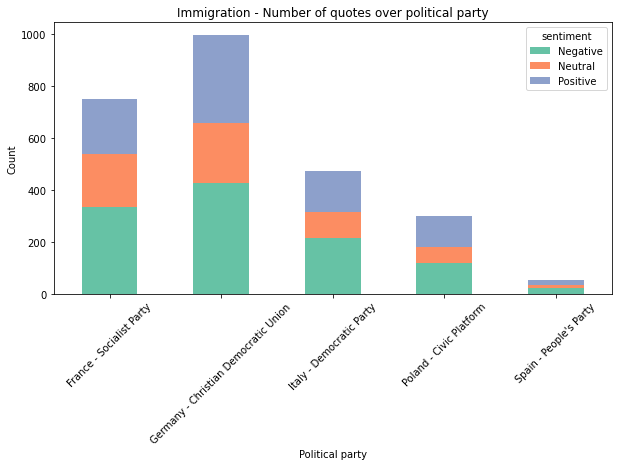

In [260]:
plot_quote_cnt_by_topic(quotes, 'Immigration')

### Sentiment analysis over time in different countries

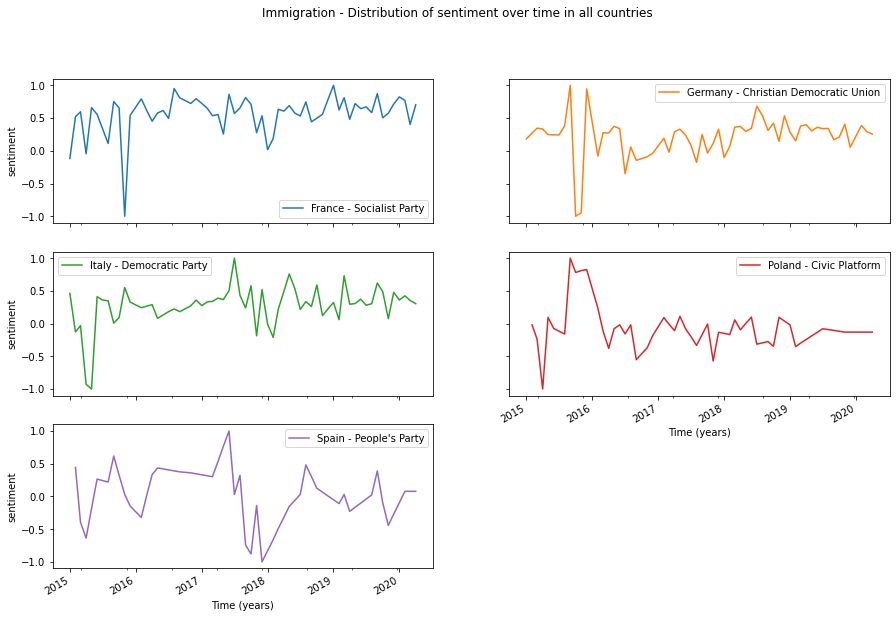

In [261]:
plot_graphs(quotes, 'Immigration')

We can now also inspect what are the periods when the polarity was the smallest or the largest:

In [262]:
_, min_quotes_germany = get_peak_valley_quotes(quotes, 'Immigration', 5, 'Germany - Christian Democratic Union')
_, min_quotes_france = get_peak_valley_quotes(quotes, 'Immigration', 5, 'France - Socialist Party')
display(min_quotes_germany)
display(min_quotes_france)
display(min_quotes_germany['quotes'][0].nsmallest(4, 'polarity_vader'))
display(min_quotes_france['quotes'][0].nsmallest(4, 'polarity_vader'))

germany_quote = min_quotes_germany['quotes'][0].nsmallest(4, 'polarity_vader').iloc[0]
print(germany_quote['speaker'], '- Germany: ', germany_quote['quotation'])
france_quote = min_quotes_france['quotes'][0].nsmallest(4, 'polarity_vader').iloc[2]
print(france_quote['speaker'], '- France: ', france_quote['quotation'])

,Germany - Christian Democratic Union,quotes
bucket_date,,
2015-10-01,-1.000000,q...
2015-11-01,-0.947209,q...
2016-07-01,-0.349564,q...
2016-09-01,-0.145518,q...
2017-08-01,-0.176332,q...


,France - Socialist Party,quotes
bucket_date,,
2015-01-01,-0.116298,...
2015-04-01,-0.045771,...
2015-08-01,0.111998,...
2015-11-01,-1.000000,...
2018-01-01,0.017709,...


,quotation,speaker,country,political_alignment,date,political_party,topic,country_political_party,polarity_textblob,polarity_vader,sentiment,bucket_date
13,"prevent irregular, illegal and dangerous refug...",Steffen Seibert,Germany,centre-right,2015-10-20 06:17:24,Christian Democratic Union,Immigration,Germany - Christian Democratic Union,-0.550000,-0.7650,Negative,2015-10-01
108,Managing the migration flow can only happen if...,Angela Merkel,Germany,centre-right,2015-10-26 03:08:19,Christian Democratic Union,Immigration,Germany - Christian Democratic Union,-0.113889,-0.7650,Negative,2015-10-01
361,A rejection [ of taking refugees in ] as a mat...,Angela Merkel,Germany,centre-right,2015-10-08 13:02:00,Christian Democratic Union,Immigration,Germany - Christian Democratic Union,-0.050000,-0.7579,Negative,2015-10-01
177,I think we have used the crisis we are experie...,Angela Merkel,Germany,centre-right,2015-10-18 07:48:01,Christian Democratic Union,Immigration,Germany - Christian Democratic Union,0.233333,-0.7479,Negative,2015-10-01


,quotation,speaker,country,political_alignment,date,political_party,topic,country_political_party,polarity_textblob,polarity_vader,sentiment,bucket_date
5424,"fight against all kinds of traffics, against t...",Francois Hollande,France,centre-left,2015-01-23 12:18:38,Socialist Party,Immigration,France - Socialist Party,-0.25,-0.9231,Negative,2015-01-01
5444,"fight against all kinds of trafficking, agains...",Francois Hollande,France,centre-left,2015-01-23 12:43:03,Socialist Party,Immigration,France - Socialist Party,-0.25,-0.9231,Negative,2015-01-01
5406,The police and judicial services have dismantl...,Manuel Valls,France,centre-left,2015-01-08 18:42:23,Socialist Party,Immigration,France - Socialist Party,0.00,-0.9217,Negative,2015-01-01
5480,"war against terrorists, Jihadists, Islamic fun...",Manuel Valls,France,centre-left,2015-01-11 14:10:48,Socialist Party,Immigration,France - Socialist Party,0.00,-0.8402,Negative,2015-01-01


Steffen Seibert - Germany:  prevent irregular, illegal and dangerous refugee flows at the Aegean
Manuel Valls - France:  The police and judicial services have dismantled numerous groups and blocked bomb plots. That's proof that we are acting. Hundreds of people are followed, dozens have been questioned, dozens have been jailed. That shows the difficulties facing our services: the number of individuals who pose a threat,


### Explanation

Looking at the plot, we can notice that both Germany and France have some overlapping time when there is a high
negative polarity corresponding to the month of January 2016.

#### <center>December 2015</center>

<center><img src="https://s.france24.com/media/display/40885c90-08ed-11e9-9a76-005056bff430/cologne-em.webp" width=600></center>

During New Year's Eve celebrations in Cologne in 2015 many women were assaulted by young men "who appeared to be of Arab or North African origin",
this caused a high wave of criticism against Germany’s large refugee population. Politicians in France, interestingly,
also were heavily criticising what had occurred in Germany.

References:
- Wikipedia
- https://www.france24.com/en/20161222-2016-year-europe-ongoing-migrant-crisis
- https://www.nytimes.com/2017/01/11/world/europe/germany-migrants-asylum-seekers.html

## Europe and Brexit

### Distribution of number of quotes per party (all countries)

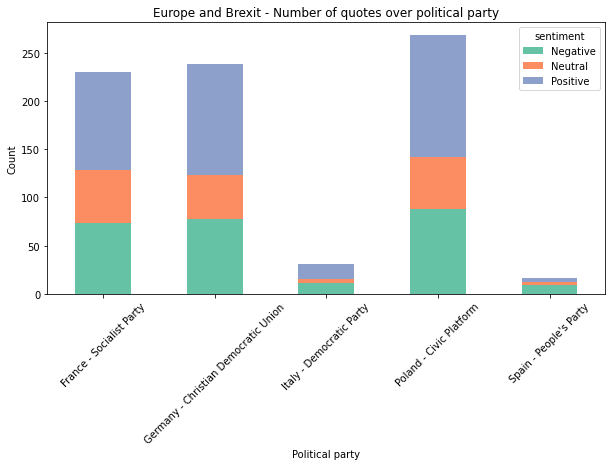

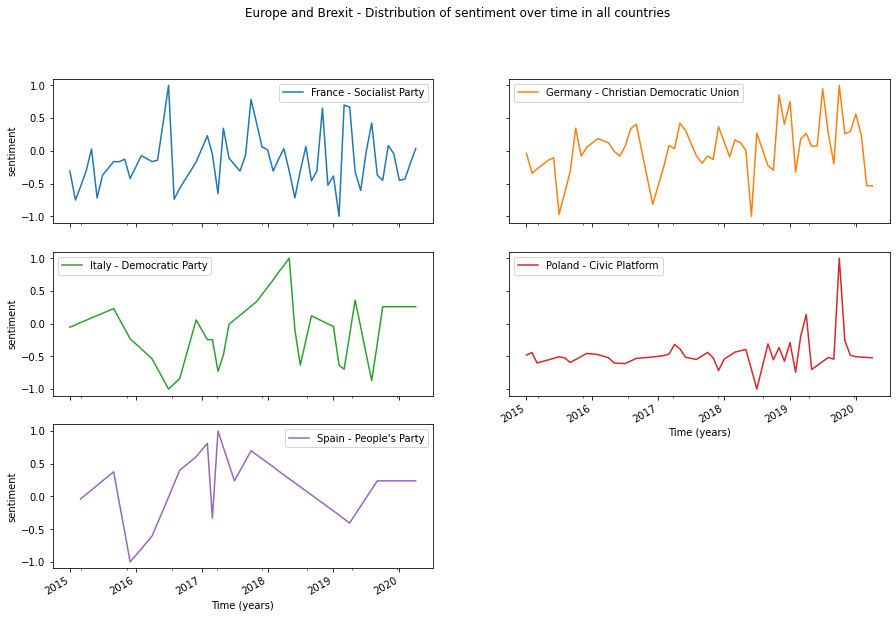

In [263]:
plot_quote_cnt_by_topic(quotes, 'Europe and Brexit')
plot_graphs(quotes, 'Europe and Brexit')

## Discrimination

### Distribution of number of quotes per party (all countries)

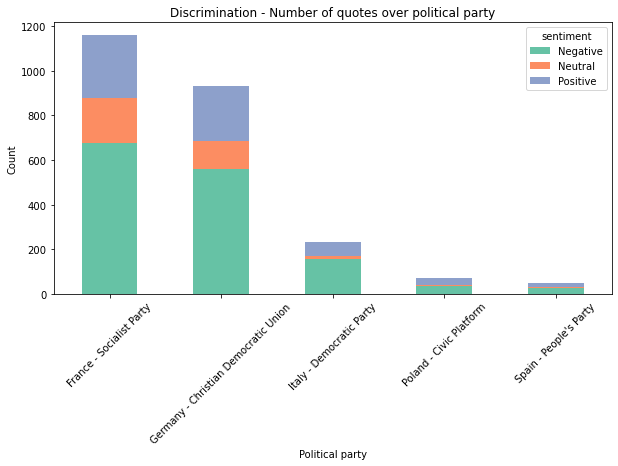

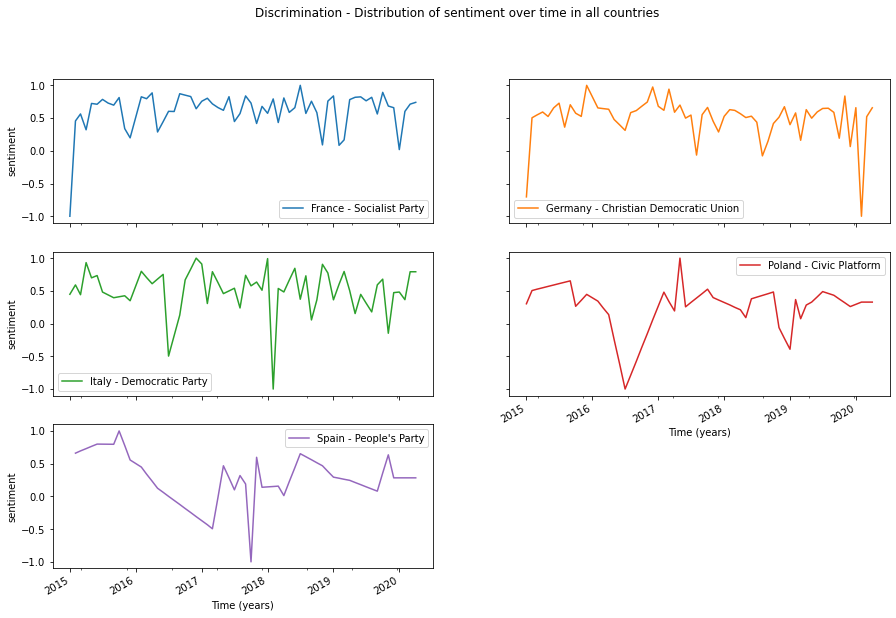

In [264]:
plot_quote_cnt_by_topic(quotes, 'Discrimination')
plot_graphs(quotes, 'Discrimination')

## Russia

### Distribution of number of quotes per party (all countries)

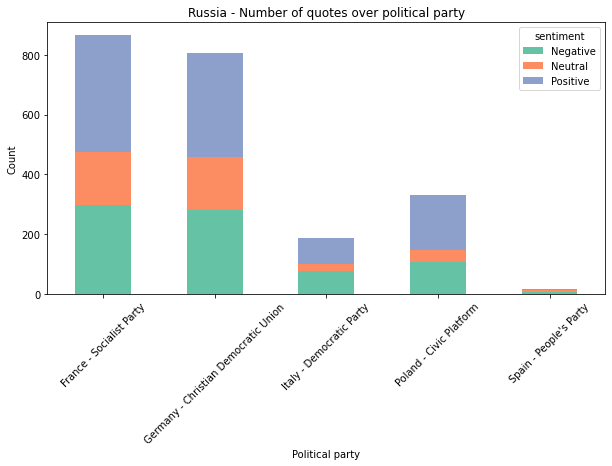

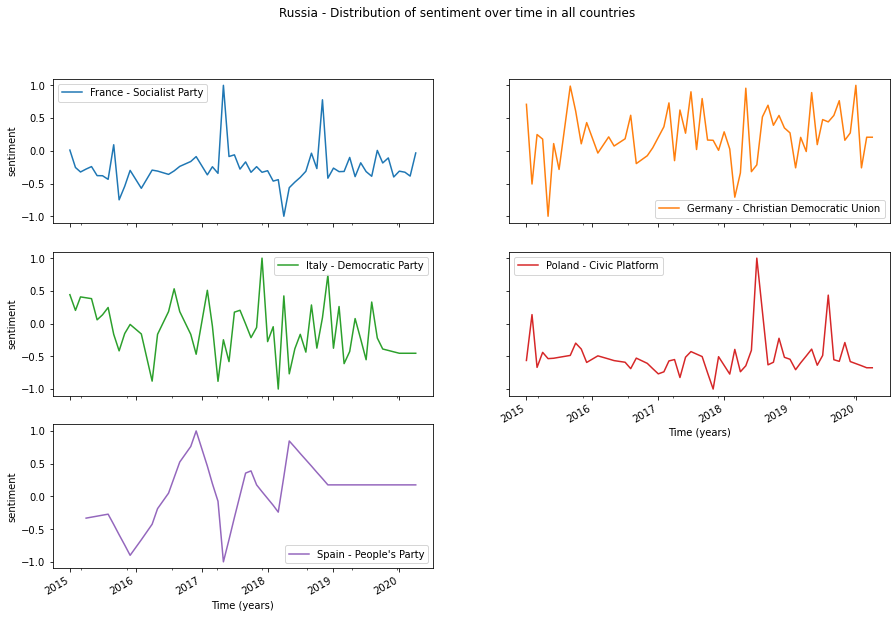

In [265]:
plot_quote_cnt_by_topic(quotes, 'Russia')
plot_graphs(quotes, 'Russia')

## Covid

### Distribution of number of quotes per party (all countries)

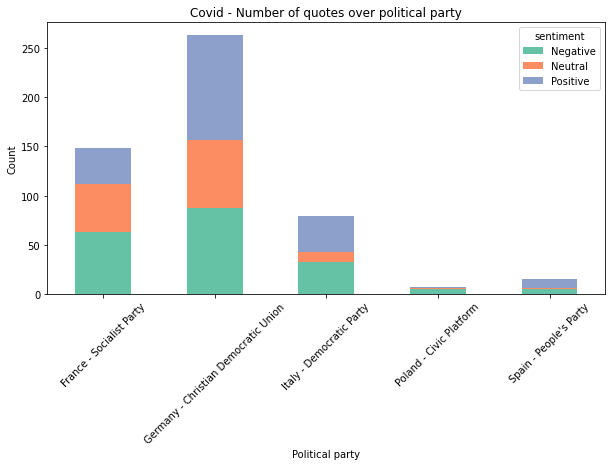

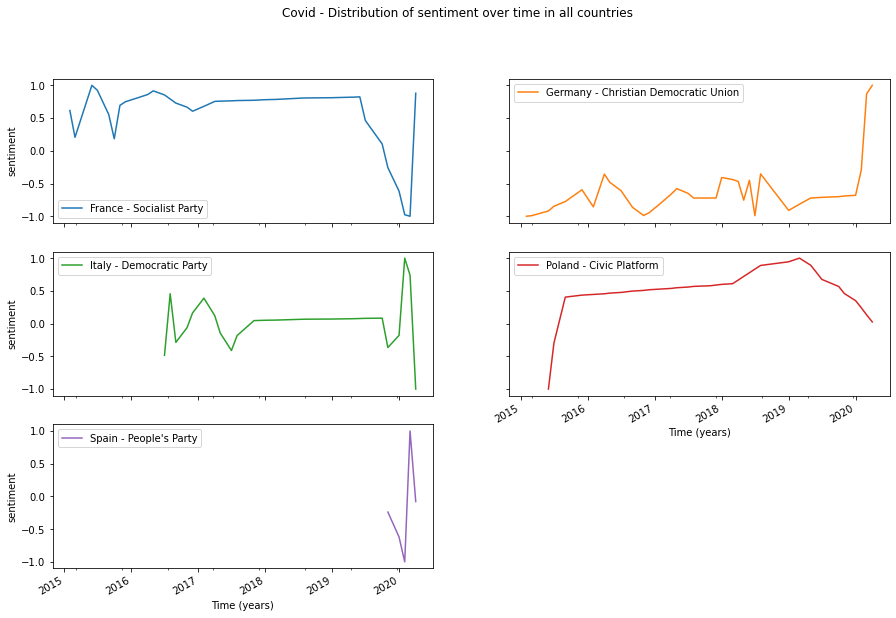

In [266]:
plot_quote_cnt_by_topic(quotes, 'Covid')
plot_graphs(quotes, 'Covid')


## Terrorism

### Distribution of number of quotes per party (all countries)

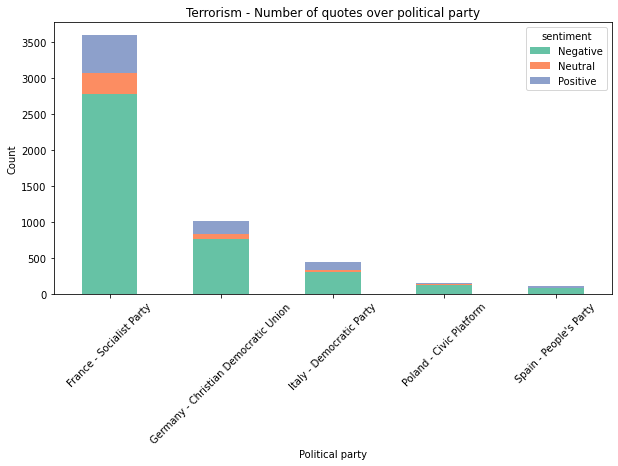

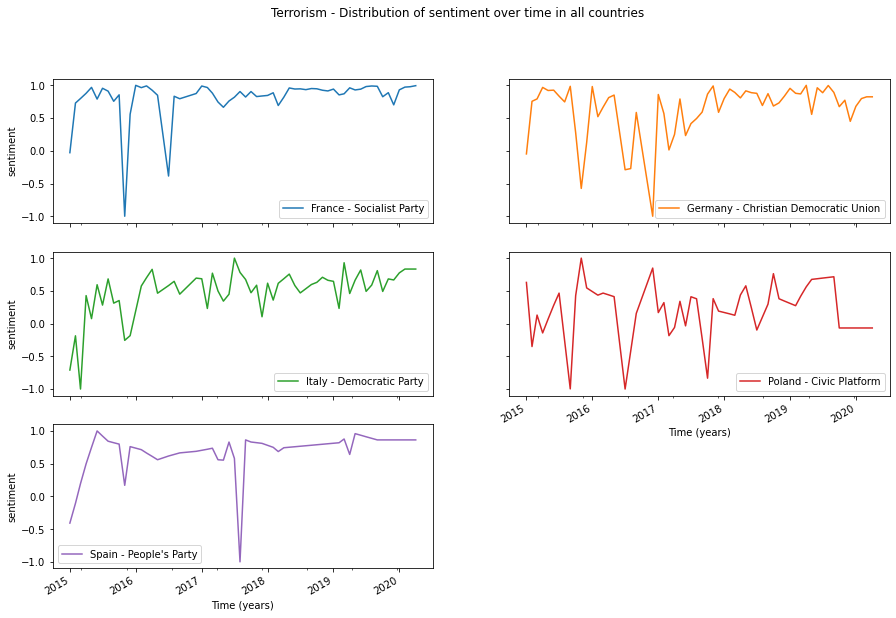

In [267]:
plot_quote_cnt_by_topic(quotes, 'Terrorism')
plot_graphs(quotes, 'Terrorism')


## Climate change

### Distribution of number of quotes per party (all countries)

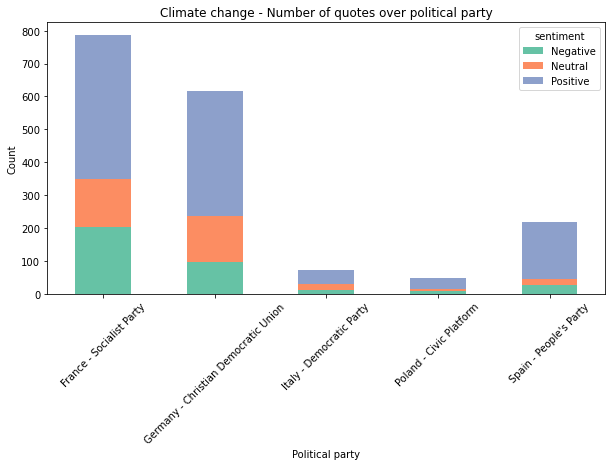

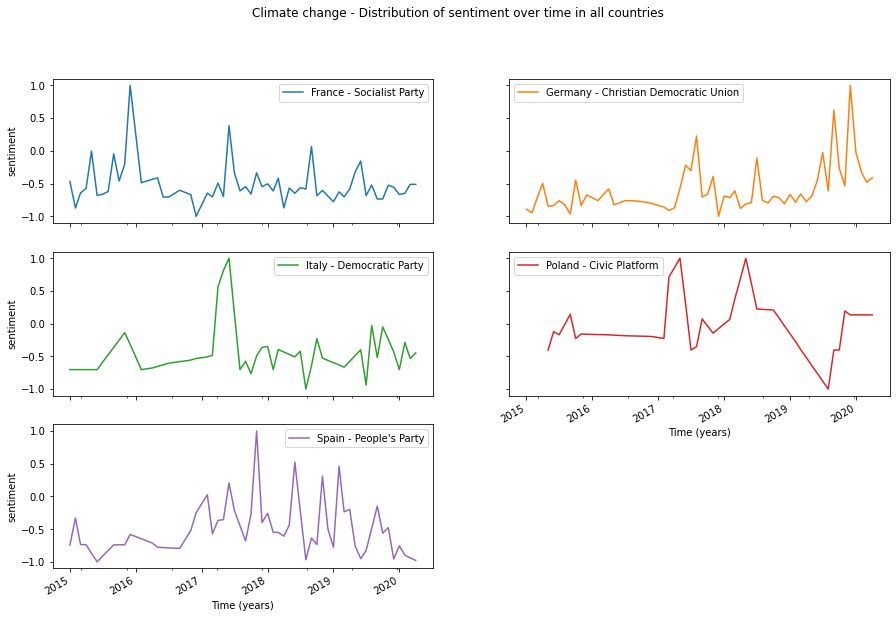

In [268]:
plot_quote_cnt_by_topic(quotes, 'Climate change')
plot_graphs(quotes, 'Climate change')


## Israeli palestinian

### Distribution of number of quotes per party (all countries)

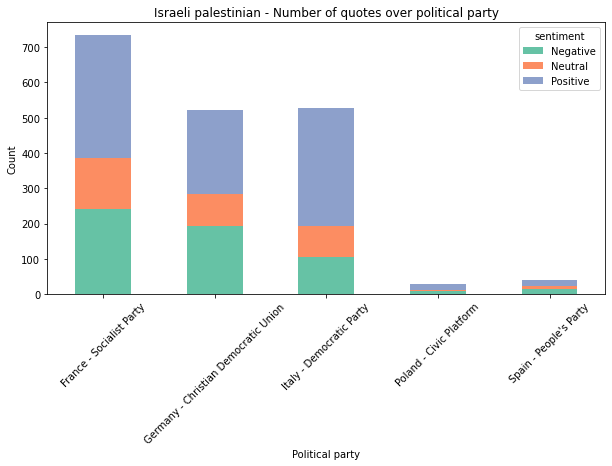

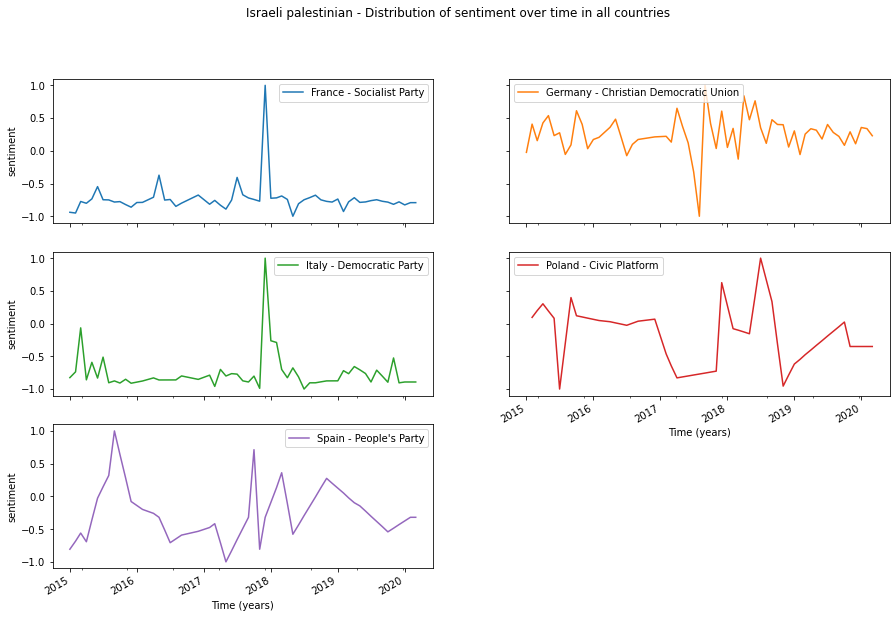

In [269]:
plot_quote_cnt_by_topic(quotes, 'Israeli palestinian')
plot_graphs(quotes, 'Israeli palestinian')
